<a href="https://colab.research.google.com/github/Fiorellaps/Pytorch-Examples/blob/main/pytorchExampleCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo de [https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)


For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

Loading and normalizing CIFAR10 using torchvision

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [6]:
 #The output of torchvision datasets are PILImage images of range [0, 1]. 
 #We transform them to Tensors of normalized range [-1, 1].
 transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#intialize train dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
#load multiple samples
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
#intialize test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                     download=True, transform=transform)
#load test data
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


More info about pytorch datasets in: [https://pytorch.org/docs/stable/torchvision/datasets.html#cifar](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)

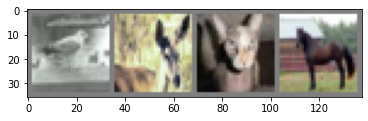

    bird        deer         cat       horse   


In [11]:
#En esta sección se muestran algunas de las imágenes que contiene el dataset.ç


import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('   %5s   ' % classes[labels[j]] for j in range(4)))


In [12]:
#torch.nn permite crear modelos de redes nueronales (nn)
import torch.nn as nn
#torch.nn.functional  includes as a wide range of loss and activation functions, 
#but also find here some convenient functions for creating neural nets, such as pooling functions.
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


##Layers

- [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html): Applies a 2D convolution over an input signal composed of several input planes.
  
  Input: (N,Cin,H,W)
    
  Output:(Ni,Cout,Hout,Wout)


where  N is a **batch size**, C denotes a **number of channels**, H is a **height** of input planes in pixels, and W is **width** in pixels.
kernel_size (kH, kW) where the first int is used for the height dimension, and the second int for the width dimension

- [MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html): Applies a 2D max pooling over an input signal composed of several input planes.

- [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#linear): Applies a linear transformation to the incoming data: **y = xA^T + b**

  Input: (N, *, Hin) where * means any number of additional dimensions and Hin = in_features (size of each input sample);

- [F.Relu](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU): Applies the rectified linear unit function element-wise.

##Define a **Loss function** and **optimizer**
using a Classification Cross-Entropy loss and SGD with momentum.

In [14]:
import torch.optim as optim
#loss function
criterion = nn.CrossEntropyLoss()
#optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


##Tarining

We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [15]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.232
[1,  4000] loss: 1.868
[1,  6000] loss: 1.684
[1,  8000] loss: 1.556
[1, 10000] loss: 1.521
[1, 12000] loss: 1.470
[2,  2000] loss: 1.411
[2,  4000] loss: 1.360
[2,  6000] loss: 1.350
[2,  8000] loss: 1.337
[2, 10000] loss: 1.311
[2, 12000] loss: 1.270
Finished Training


In [ ]:
#https://pytorch.org/docs/stable/notes/serialization.html to save models
#save trained model
#PATH = './cifar_net.pth'
#torch.save(net.state_dict(), PATH)

##Test
We need to verify if the learnt from the trainning.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

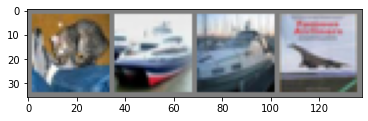

GroundTruth:    cat     ship     ship    plane   


In [18]:
#Example of images in test set
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s   ' % classes[labels[j]] for j in range(4)))

In [ ]:
#Load saved model if saved
#net = Net()

#net.load_state_dict(torch.load(PATH)

In [20]:
#imprimimos la etiqueta que nuestro modelo daría a las imágenes previamente mostradas
outputs = net(images)


In [21]:
#The outputs are energies for the 10 classes. The higher the energy for a class, 
#the more the network thinks that the image is of the particular class. 
#So, let’s get the index of the highest energy:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


In [22]:
# Output for the whole dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total)'and correct:'correct) 

Accuracy of the network on the 10000 test images: 55 %


In [35]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 68 %
Accuracy of  bird : 48 %
Accuracy of   cat : 39 %
Accuracy of  deer : 51 %
Accuracy of   dog : 48 %
Accuracy of  frog : 56 %
Accuracy of horse : 56 %
Accuracy of  ship : 71 %
Accuracy of truck : 52 %


##Training on GPU

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0
